# # Assignment 3 - Chapter 3: Reproducible Research (Insight-as-a-Code)

Customer 360 Degree View Dataset Using Case Study: Brazilian E-Commerce Public Dataset by Olist

> Name: Latifah Hukma S

> ID: DS03083

# 1 Import & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# import geoviews as gv
# import geoviews.tile_sources as gvts
# from geoviews import dim, opts
# gv.extension('bokeh')

In [2]:
cust = pd.read_csv('../input/brazilian-ecommerce/olist_customers_dataset.csv')
geo = pd.read_csv('../input/brazilian-ecommerce/olist_geolocation_dataset.csv')
items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
payments = pd.read_csv('../input/brazilian-ecommerce/olist_order_payments_dataset.csv')
reviews = pd.read_csv('../input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
products = pd.read_csv('../input/brazilian-ecommerce/olist_products_dataset.csv')
sellers = pd.read_csv('../input/brazilian-ecommerce/olist_sellers_dataset.csv')
cat = pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')

# 2 Exploratory Data Analysis

In [3]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
cust.describe(include=object)

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [6]:
cust.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [10]:
geo.describe(include=object)

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


In [11]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
items.iloc[:,5:].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [14]:
items.iloc[:,4:].describe(include=object)

,shipping_limit_date
count,112650
unique,93318
top,2017-07-21 18:25:23
freq,21


In [15]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [16]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [17]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [19]:
payments.describe(include=object)

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


In [20]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [21]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [24]:
reviews.iloc[:,2:].describe(include=object)

,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,11568,40977,99224,99224
unique,4527,36159,636,98248
top,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,423,230,463,4


In [25]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
orders.iloc[:,2:].describe()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99281,97658,96476,99441
unique,8,98875,90733,81018,95664,459
top,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,96478,3,9,47,3,522


In [29]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [30]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [31]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [33]:
products.iloc[:,1:].describe(include=object)

,product_category_name
count,32341
unique,73
top,cama_mesa_banho
freq,3029


In [34]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [35]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [36]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [37]:
sellers.iloc[:,2:].describe()

,seller_city,seller_state
count,3095,3095
unique,611,23
top,sao paulo,SP
freq,694,1849


In [38]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [39]:
cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [40]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [41]:
cat.describe(include=object)

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [42]:
cat.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

# 2.1 Perbandingan Customer Repurchased vs Tidak

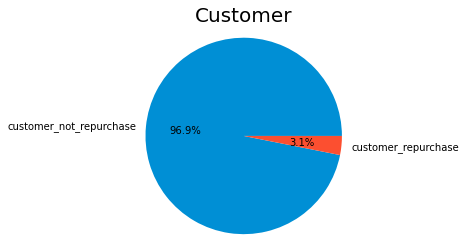

In [43]:
# menghitung total customer asli
unique = cust['customer_unique_id'].value_counts()

# menghitung total customer asli yang melakukan repurchase
repurchase = unique[unique > 1]

# menghitung total customer asli yang melakukan tidak repurchase
buy_one = unique[unique == 1]

# memplot perbandingan customer yang melakukan repurchased dengan yang tidak
labels = ['customer_not_repurchase', 'customer_repurchase']
data = [buy_one.size, repurchase.size]

plt.title(label="Customer", fontsize=20)
plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

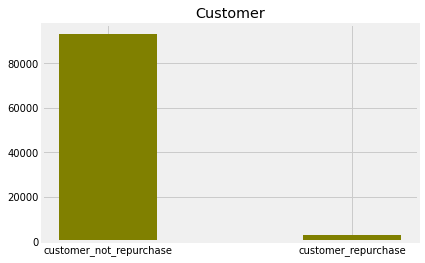

In [44]:
plt.bar(labels, data, color ='olive', width = 0.4)
plt.title("Customer")
plt.show()

<font size="4">Tampak bahwa **dari total seluruh customer, hanya 3.1% yang melakukan repurchase** product. Dengan kata lain, dari 96096 customer, terdapat 2997 customer yang melakukan pembelian kembali di store, sedangkan sisanya tidak.</font>

# 2.2 Persebaran Lokasi Customer

<AxesSubplot:title={'center':'Top 20 Kota Tujuan Order Terbanyak'}>

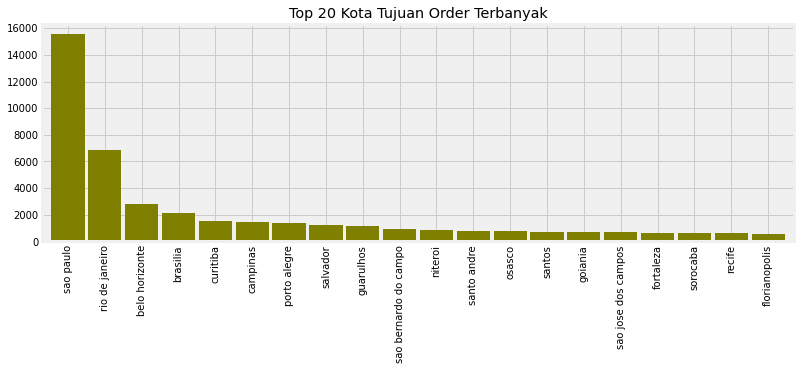

In [45]:
a = cust['customer_city'].value_counts().head(20)

a.plot(kind='bar', color='olive', width=0.9, figsize=(12,4), title='Top 20 Kota Tujuan Order Terbanyak', grid=True)

<font size="4">Grafik di atas merupakan data 20 kota yang memiliki total order terbanyak. **Kota Sao Paulo menempati posisi pertama** sebagai kota dengan jumlah order customer terbanyak, yakni mendekati 16000 order. Di posisi kedua terdapat Kota Rio de Janeiro dengan total order mendekati 7000 order, sedangkan di posisi ketiga terdapat Kota Belo Horizonte. Dengan kata lain, **masyarakat Kota Sao Paulo lebih sering melakukan kegiatan belanja di marketplace e-commerce dibandingkan masyarakat kota lain di Brazil**.</font>

# 2.3 Product Terlaris

<AxesSubplot:title={'center':'Top 10 Kategori Product dengan Penjualan Terbanyak'}, xlabel='product_category_name_english'>

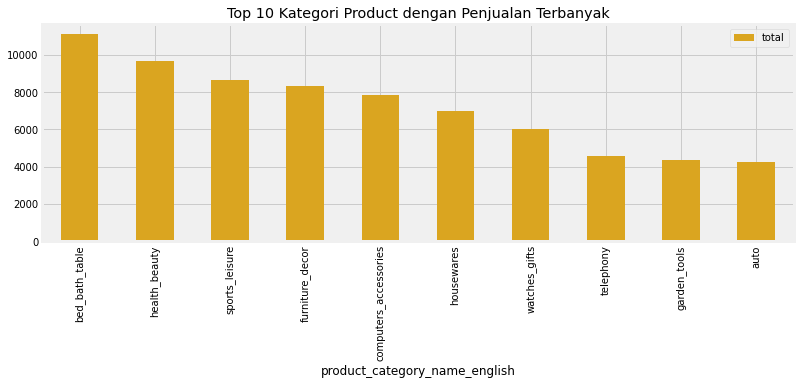

In [46]:
# mengambil total product yang terjual
total_items_sold = items[['product_id']].value_counts().rename_axis('product_id').reset_index(name='total')

# merging total product dengan kategorinya
total_items_sold = total_items_sold.merge(products, on='product_id')
total_items_sold = total_items_sold.iloc[:,:3]
total_items_sold = total_items_sold.merge(cat, on='product_category_name')

# menjumlahkan total masing-masing kategori yang terjual
total_items_sold_eng = total_items_sold.groupby('product_category_name_english').sum().sort_values(by='total', ascending=False)

# plot top 10 kategori product yang terlaris
total_items_sold_eng.head(10).plot(kind='bar', 
                                   color='goldenrod', 
                                   width=0.5, 
                                   figsize=(12,4), 
                                   title='Top 10 Kategori Product dengan Penjualan Terbanyak', 
                                   grid=True)

# 3 Feature Engineering

# 3.1 Total Order Tiap Customer

In [47]:
cust[['customer_unique_id']].value_counts().rename_axis('customer_unique_id').reset_index(name='total_order')

,customer_unique_id,total_order
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,ca77025e7201e3b30c44b472ff346268,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
96091,5657dfebff5868c4dc7e8355fea865c4,1
96092,5657596addb4d7b07b32cd330614bdf8,1
96093,5656eb169546146caeab56c3ffc3d268,1
96094,5656a8fabc8629ff96b2bc14f8c09a27,1


# 3.2 Waktu Purchase Tiap Customer

## 3.2.1 Waktu Purchase Tiap Customer (Time)

In [48]:
cust_orders = orders.iloc[:,[1,3]].merge(cust, on='customer_id')
cust_orders = cust_orders.iloc[:,:3]

# ambil waktunya
cust_orders['purchase_time'] = cust_orders['order_purchase_timestamp'].str.split().str.get(1)
cust_orders['purchase_time'] = cust_orders['purchase_time'].str.split(':').str.get(0)
cust_orders['purchase_time'] = cust_orders['purchase_time'].astype(int)

# menentukan waktu
def func(row):
    if row['purchase_time'] >= 6 and row['purchase_time'] < 12:
        return 'morning'
    elif row['purchase_time'] >= 12 and row['purchase_time'] < 16:
        return 'noon'
    elif row['purchase_time'] >= 16 and row['purchase_time'] < 19:
        return 'evening'
    elif row['purchase_time'] >= 19 and row['purchase_time'] < 24:
        return 'night'
    else:
        return 'midnight'

cust_orders['purchase_time'] = cust_orders.apply(func, axis=1)

cust_orders

,customer_id,order_purchase_timestamp,customer_unique_id,purchase_time
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,morning
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,night
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,morning
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,night
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,night
...,...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,morning
99437,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,noon
99438,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,noon
99439,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,night


In [49]:
# ambil frequency waktu purchase masing-masing customer
cust_orders_time = cust_orders[['customer_unique_id','purchase_time','customer_id']].groupby(['customer_unique_id','purchase_time']).count().reset_index()

# buat feature baru
cust_orders_time = cust_orders_time.pivot_table('customer_id', ['customer_unique_id'], 'purchase_time')

# handling NaN
cust_orders_time = cust_orders_time.fillna(0)

# showing dataframe
cust_orders_time = cust_orders_time.rename_axis(None, axis=1).reset_index()
cust_orders_time.sort_values(by='night', ascending=False)

,customer_unique_id,evening,midnight,morning,night,noon
52973,8d50f5eadf50201ccdcedfb9e2ac8455,1.0,0.0,1.0,14.0,1.0
43934,74cb1ad7e6d5674325c1f99b5ea30d82,0.0,1.0,0.0,4.0,0.0
43352,732d307839b02bc2d3a4c26b515ea2b9,0.0,0.0,0.0,3.0,0.0
58920,9cc5a07f169a1606fd347a56683e6ea6,0.0,1.0,0.0,3.0,0.0
70413,bb58670190dba4e9b320f84cb98317a3,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...
47529,7e48fce1b9f081327baf3aabf7d1a993,1.0,0.0,0.0,0.0,0.0
14219,25b2ebd48f0514f355a8294c53d9df25,1.0,0.0,0.0,0.0,0.0
47531,7e492b1caa3a7f4b2cde0d3f2316ae2b,0.0,0.0,0.0,0.0,1.0
47532,7e494da033761889a5e8cd607219cd24,1.0,0.0,0.0,0.0,0.0


<font size="4">Data di atas merupakan persebaran waktu pembelian masing-masing customer. Waktu terbagi menjadi morning, noon, evening, night, dan midnight, dengan ketentuan sebagai berikut

    morning  = 06:00 - 12:00
    noon     = 12:00 - 15:00
    evening  = 15:00 - 18:00
    night    = 18:00 - 23:00
    midnight = 23:00 - 06:00
    
</font>

## 3.2.2 Sebaran Waktu Purchase Seluruh Customer (Time)

In [50]:
cust_time_purchase = cust_orders[['customer_id','purchase_time']].groupby('purchase_time').count()
cust_time_purchase.sort_values(by='customer_id', ascending=False)

,customer_id
purchase_time,
night,28331
noon,25536
morning,22240
evening,18594
midnight,4740


<font size="4">Mayoritas customer membeli pada saat malam hari, yakni antara jam 18:00 - 23:00</font>

## 3.2.3 Waktu Purchase Tiap Customer (Month)

In [51]:
cust_orders_date = cust_orders.iloc[:,:3]

# ambil tanggalnya
cust_orders_date['purchase_date'] = cust_orders_date['order_purchase_timestamp'].str.split().str.get(0)
cust_orders_date['purchase_date'] = cust_orders_date['purchase_date'].str.split('-').str.get(2)
cust_orders_date['purchase_date'] = cust_orders_date['purchase_date'].astype(int)

# menentukan waktu
def func(row):
    if row['purchase_date'] <= 10:
        return 'beginning_month'
    elif row['purchase_date'] > 10 and row['purchase_date'] <= 20:
        return 'middle_month'
    else:
        return 'end_month'

cust_orders_date['purchase_date'] = cust_orders_date.apply(func, axis=1)

# cust_orders
cust_orders_date

,customer_id,order_purchase_timestamp,customer_unique_id,purchase_date
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,beginning_month
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,end_month
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,beginning_month
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,middle_month
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,middle_month
...,...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,beginning_month
99437,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,beginning_month
99438,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,end_month
99439,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,beginning_month


In [52]:
# ambil frequency waktu (tanggal_bulan) purchase masing-masing customer
cust_orders_month = cust_orders_date[['customer_unique_id','purchase_date','customer_id']].groupby(['customer_unique_id','purchase_date']).count().reset_index()

# buat feature baru
cust_orders_month = cust_orders_month.pivot_table('customer_id', ['customer_unique_id'], 'purchase_date')

# handling NaN
cust_orders_month = cust_orders_month.fillna(0)

# showing dataframe
cust_orders_month = cust_orders_month.rename_axis(None, axis=1).reset_index()
cust_orders_month.sort_values(by='middle_month', ascending=False)

,customer_unique_id,beginning_month,end_month,middle_month
52973,8d50f5eadf50201ccdcedfb9e2ac8455,4.0,6.0,7.0
23472,3e43e6105506432c953e165fb2acf44c,3.0,1.0,5.0
3966,0a61b571f594b6919601bcf3380da7f7,0.0,0.0,3.0
21578,394ac4de8f3acb14253c177f0e15bc58,1.0,1.0,3.0
21638,397b44d5bb99eabf54ea9c2b41ebb905,1.0,0.0,3.0
...,...,...,...,...
38734,66deee474bda15823465c6f18a05ebb7,1.0,0.0,0.0
38733,66dd7b48d24397d554c2af2b30cbd407,0.0,1.0,0.0
38732,66dc6011c7df478233a09360f68dea20,1.0,0.0,0.0
38731,66d916b6e4e889e481c2b7a32da0f10a,0.0,1.0,0.0


<font size="4">Data di atas merupakan persebaran waktu pembelian masing-masing customer (dalam periode bulan). Waktu terbagi menjadi beginning_month, middle_month, end_month, dengan ketentuan sebagai berikut

    beginning_month  = tanggal 1 - 10
    middle_month     = tanggal 11 - 20
    end_month        = tanggal 21 - 31
    
</font>

# 3.3 Metode Pembayaran Tiap Customer Yang Order

In [53]:
# merging dengan data cust
cust_payments = payments.iloc[:,[0,2]].merge(orders, on='order_id')
cust_payments = cust_payments.iloc[:,:3]

# ambil frequency metode pembayaran masing-masing order
cust_payments = cust_payments[['order_id','payment_type','customer_id']].groupby(['customer_id','payment_type']).count().reset_index()
# cust_payments

# buat feature baru
cust_payments = cust_payments.pivot_table('order_id', ['customer_id'], 'payment_type')

# handling NaN
cust_payments = cust_payments.fillna(0)

# showing dataframe
cust_payments = cust_payments.rename_axis(None, axis=1).reset_index()
cust_payments = cust_payments.merge(cust, on='customer_id')
cust_payments = cust_payments.iloc[:,:7]
cust_payments = cust_payments.groupby('customer_unique_id').sum().reset_index()
cust_payments

,customer_unique_id,boleto,credit_card,debit_card,not_defined,voucher
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,1.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,1.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,1.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,1.0,0.0,0.0,0.0
96091,fffea47cd6d3cc0a88bd621562a9d061,0.0,1.0,0.0,0.0,0.0
96092,ffff371b4d645b6ecea244b27531430a,0.0,1.0,0.0,0.0,0.0
96093,ffff5962728ec6157033ef9805bacc48,0.0,1.0,0.0,0.0,0.0


In [54]:
# merging dengan data cust
cust_payments_all = payments.iloc[:,[0,2]].merge(orders, on='order_id')

# cek orderan yang sudah selesai proses pembayaran
print("total order yang telah melakukan pembayaran =", cust_payments_all['customer_id'].value_counts().size)
print("total order yang masuk =", cust['customer_id'].value_counts().size)

total order yang telah melakukan pembayaran = 99440
total order yang masuk = 99441


<font size="4">Tampak bahwa ada 1 orderan yang belum menyelesaikan pembayaran</font>

## 3.3.1 Sebaran Metode Pembayaran Seluruh Order

In [55]:
payments['payment_type'].value_counts().to_frame()

,payment_type
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


<font size="4">Credit card merupakan metode pembayaran yang paling banyak dipilih customer dalam melakukan proses pembayaran</font>